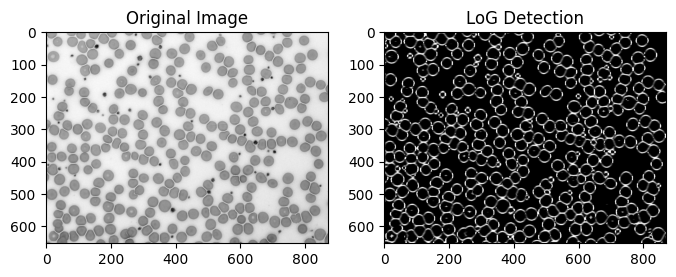

In [ ]:
import cv2
import numpy as np
from scipy.ndimage import gaussian_laplace
import matplotlib.pyplot as plt

# Load the microscope image
image = cv2.imread('Picture1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply LoG
log_image = gaussian_laplace(image, sigma=2)

# Normalize for display
log_image = (log_image - log_image.min()) / (log_image.max() - log_image.min())

# Display
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(log_image, cmap='gray'), plt.title('LoG Detection')
plt.show()


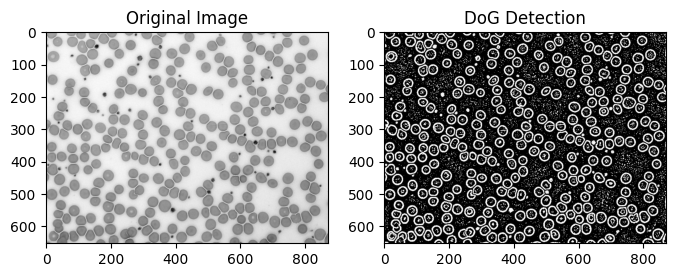

In [ ]:
def difference_of_gaussian(image, sigma1, sigma2):
    blur1 = cv2.GaussianBlur(image, (0, 0), sigma1)
    blur2 = cv2.GaussianBlur(image, (0, 0), sigma2)
    return blur1 - blur2

# Apply DoG
dog_image = difference_of_gaussian(image, sigma1=1, sigma2=2)

# Normalize for display
dog_image = (dog_image - dog_image.min()) / (dog_image.max() - dog_image.min())

# Display
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(dog_image, cmap='gray'), plt.title('DoG Detection')
plt.show()


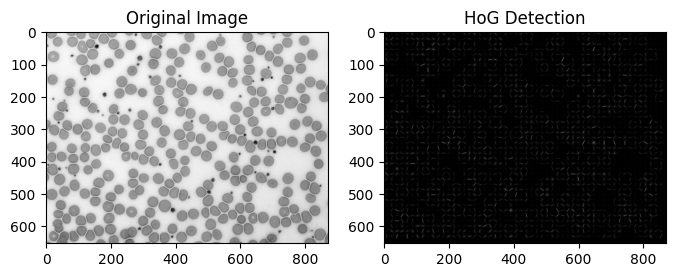

In [ ]:
from skimage.feature import hog
from skimage import color

# Compute HoG features
hog_features, hog_image = hog(image, visualize=True, pixels_per_cell=(16, 16), cells_per_block=(1, 1))

# Display
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(hog_image, cmap='gray'), plt.title('HoG Detection')
plt.show()


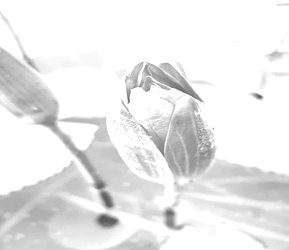

In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread('Picture2.jpg', cv2.IMREAD_GRAYSCALE)
def adjust_brightness_contrast(image, alpha=1.5, beta=30):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
enhanced_image = adjust_brightness_contrast(image)
cv2_imshow(enhanced_image)  # Display image
#cv2.imshow("Brightness & Contrast", enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


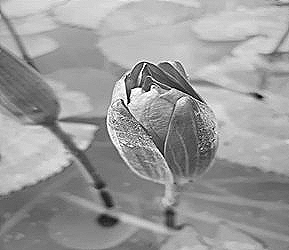

In [ ]:
# Sharpening kernel
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

cv2_imshow(sharpened_image)
#cv2.imshow("Sharpened Image", sharpened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


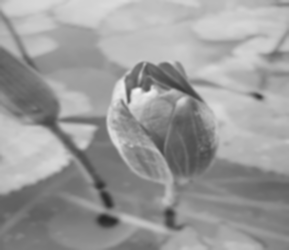

In [ ]:
denoised_image = cv2.GaussianBlur(image, (5, 5), 0)

cv2_imshow( denoised_image)
#cv2.imshow("Denoised Image", denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


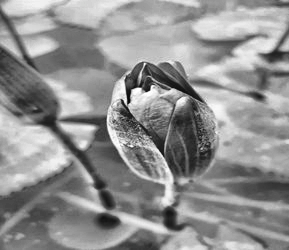

In [ ]:


# Load image


# If the image is grayscale, convert it to BGR
if len(image.shape) == 2 or image.shape[-1] == 1:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Convert to LAB color space
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
l = clahe.apply(l)
enhanced_lab = cv2.merge([l, a, b])

# Convert back to BGR
enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)

# Display result
cv2_imshow(enhanced_image)


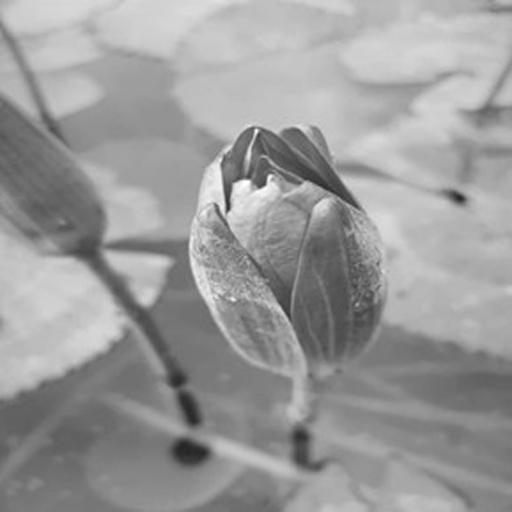

In [ ]:
#resizing
resized_image = cv2.resize(image, (512, 512), interpolation=cv2.INTER_CUBIC)
cv2_imshow(resized_image)
#cv2.imshow("Resized Image", resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


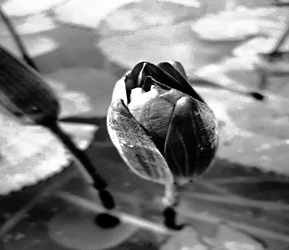

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use this for displaying images in Colab

# Load the image in grayscale mode
image = cv2.imread('Picture2.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    raise ValueError("Error: Image not loaded. Check file path!")

# Convert to 8-bit if needed
if image.dtype != np.uint8:
    image = cv2.convertScaleAbs(image)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the result
cv2_imshow(equalized_image)  # Use this in Google Colab
# If running locally, use: cv2.imshow("Equalized Image", equalized_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


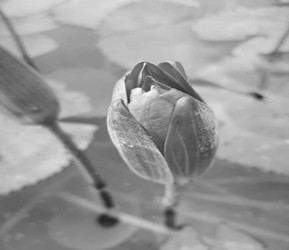

In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread('Picture2.jpg', cv2.IMREAD_GRAYSCALE)

def inverse_transform(image):
    return cv2.bitwise_not(image)

cv2_imshow(image)

In [ ]:
!pip install opencv-contrib-python


In [ ]:
!wget -O EDSR_x4.pb https://github.com/fannymonori/TF-ESPCN/raw/master/export/EDSR_x4.pb


--2025-03-27 14:44:38--  https://github.com/fannymonori/TF-ESPCN/raw/master/export/EDSR_x4.pb
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-03-27 14:44:38 ERROR 404: Not Found.



In [ ]:
!pip uninstall -y numpy opencv-python opencv-contrib-python
!pip install numpy==1.23.5 opencv-contrib-python==4.5.5.64


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: opencv-contrib-python 4.5.5.64
Uninstalling opencv-contrib-python-4.5.5.64:
  Successfully uninstalled opencv-contrib-python-4.5.5.64
  Using cached opencv_contrib_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 82.8 MB/s eta 0:00:00
Using cached opencv_contrib_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (66.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires opencv-python>=3.4.8.29, which is not installed.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatibl

In [ ]:
!wget -O LapSRN_x8.pb https://github.com/nihui/LapSRN/raw/master/models/LapSRN_x8.pb


--2025-03-27 14:48:31--  https://github.com/nihui/LapSRN/raw/master/models/LapSRN_x8.pb
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-03-27 14:48:31 ERROR 404: Not Found.



In [ ]:
!pip uninstall -y opencv-python opencv-contrib-python
!pip install opencv-contrib-python==4.7.0.72


Found existing installation: opencv-contrib-python 4.5.5.64
Uninstalling opencv-contrib-python-4.5.5.64:
  Successfully uninstalled opencv-contrib-python-4.5.5.64
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 MB 10.9 MB/s eta 0:00:00


In [ ]:
!wget -O EDSR_x4.pb https://github.com/fannymonori/TF-ESPCN/raw/master/export/EDSR_x4.pb


--2025-03-27 14:49:42--  https://github.com/fannymonori/TF-ESPCN/raw/master/export/EDSR_x4.pb
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-03-27 14:49:43 ERROR 404: Not Found.



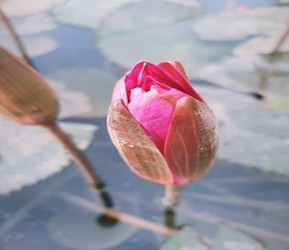

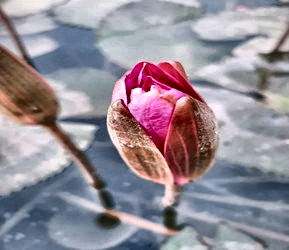

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the image
image = cv2.imread('Picture2.jpg')

# Check if image is loaded
if image is None:
    raise ValueError("Error: Image not loaded. Check file path!")

# Convert to LAB color space
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split LAB channels
l, a, b = cv2.split(lab)

# Apply CLAHE to the L channel (for better brightness/contrast)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
l = clahe.apply(l)

# Merge channels back
corrected_lab = cv2.merge([l, a, b])

# Convert back to BGR color space
corrected_image = cv2.cvtColor(corrected_lab, cv2.COLOR_LAB2BGR)

# Show the original and corrected images
cv2_imshow(image)  # Original Image
cv2_imshow(corrected_image)  # Color Corrected Image
